In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/SamithaPrabath/course-finder/master/risk_calculate.csv')

# Preprocess the data
label_encoder = LabelEncoder()
data['university_encoded'] = label_encoder.fit_transform(data['University'])
data['course_encoded'] = label_encoder.fit_transform(data['Specialization (Only for IT graduates/undergraduates)'])
data['loan_amount_encoded'] = label_encoder.fit_transform(data['Applied Loan Amount'])
data['year_encoded'] = label_encoder.fit_transform(data['Year Of Course'])


target = 'Duration Of course '
X = data[['university_encoded', 'course_encoded', 'loan_amount_encoded', 'year_encoded', 'GPA']]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




Mean Squared Error: 0.039133663366336634


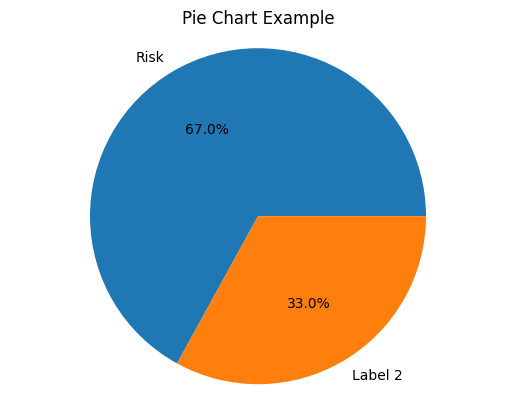

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Example usage: Predict the course duration for new inputs
data = {
    'University': ['NSBM'],
    'Specialization (Only for IT graduates/undergraduates)': ['Software Engineering'],
    'Applied Loan Amount': [100000],
    'Year Of Course': [4],
    'GPA': [2.5]
}
data = pd.DataFrame(data)
label_encoder = LabelEncoder()
data['university_encoded'] = label_encoder.fit_transform(data['University'])
data['course_encoded'] = label_encoder.fit_transform(data['Specialization (Only for IT graduates/undergraduates)'])
data['loan_amount_encoded'] = label_encoder.fit_transform(data['Applied Loan Amount'])
data['year_encoded'] = label_encoder.fit_transform(data['Year Of Course'])

X_test = data[['university_encoded', 'course_encoded', 'loan_amount_encoded', 'year_encoded', 'GPA']]

# Make predictions using the trained model
predictions = model.predict(X_test)

data_1 = predictions - data['Year Of Course'][0]
data_2 = 1 - (predictions - data['Year Of Course'][0])

labels = ['Risk', 'Label 2']
sizes = [data_1[0], data_2[0] ]  # The values representing the sizes of each slice

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.axis('equal')

plt.title('Pie Chart Example')

plt.show()
